# Ultimate Data Challenge

## Part 1 - Exploratory Data Analysis

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [169]:
#import login.json fileabs
logins=pd.read_json('logins.json')

In [170]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [171]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


The logins file contains logins from January 1970 to Apirl 1970. 

In [172]:
# add count column
logins['count']=1

# set the time as index
logins_agg = logins.set_index('login_time')

# aggregate timestamp based on 15 minutes intervals
logins_agg = logins_agg.resample('15T').sum()

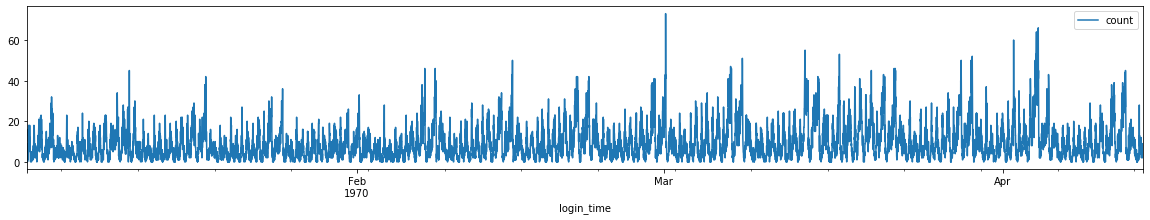

In [173]:
# plot the logins based on 15 minutes inyervals
logins_agg.plot(linestyle='-',figsize=(20,3))

There is certain undelying pattern, but it is hard to draw conclusion because of the scale. It needs further scale-down process.

Text(0.5, 1.0, 'April logins')

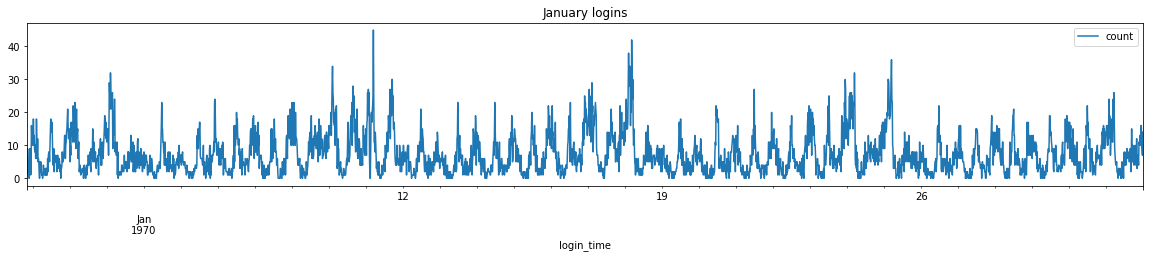

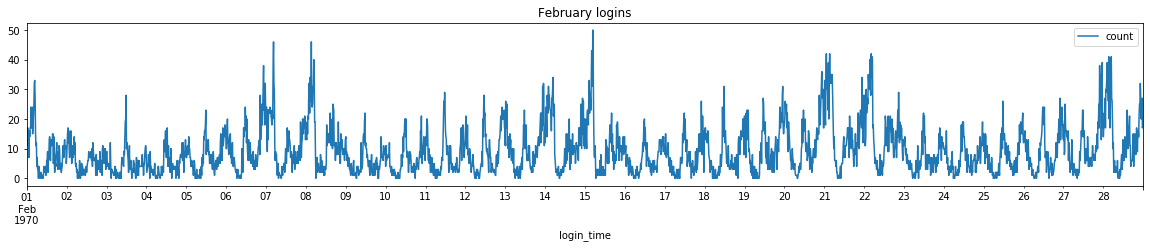

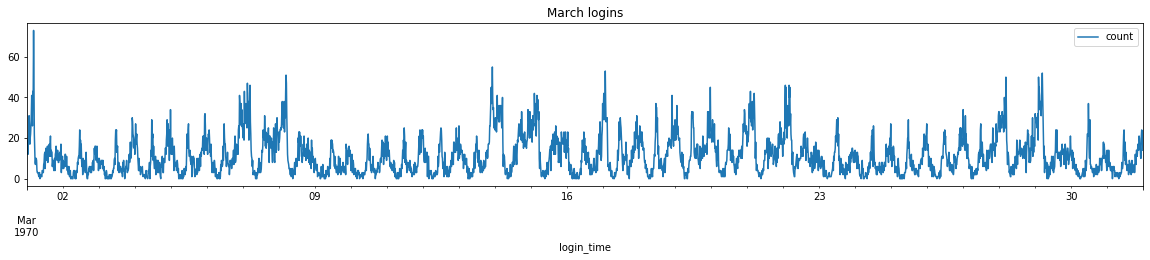

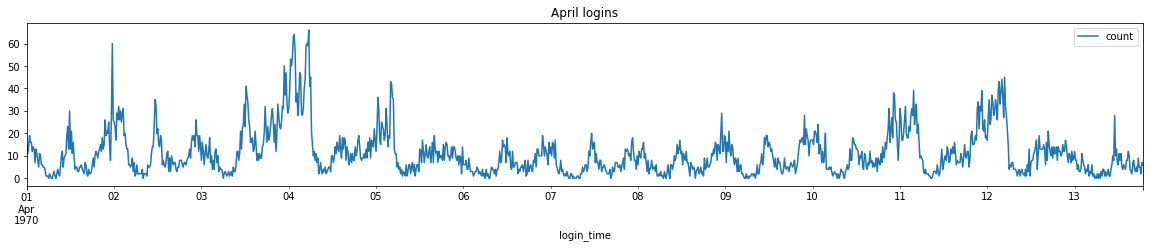

In [174]:
# Monthly plot of January
ax1 = logins_agg.loc['1970-01-01':'1970-01-31'].plot(figsize=(20,3))
ax1.set_title('January logins')

# Monthly plot of February
ax2 = logins_agg.loc['1970-02-01':'1970-02-28'].plot(figsize=(20,3))
ax2.set_title('February logins')

# Monthly plot of March
ax3 = logins_agg.loc['1970-03-01':'1970-03-31'].plot(figsize=(20,3))
ax3.set_title('March logins')

# Monthly plot of April
ax4 = logins_agg.loc['1970-04-01':'1970-04-30'].plot(figsize=(20,3))
ax4.set_title('April logins')

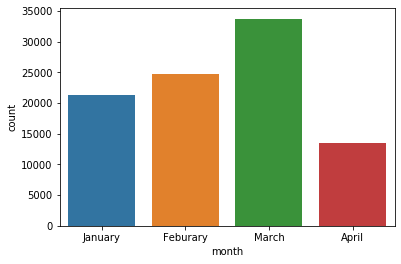

In [175]:
# Plot the Monthly Count

login_month=logins_agg.resample('M').sum()
login_month['month']=['January','Feburary','March','April']
sns.barplot(x='month',y='count',data=login_month)

There is obvious pattern of time stamp, which is very daily change. Also, there is possible weekly pattern. Besides, there is increasing from January to March. There is only partially data of April, so Apirl should be excluded. 

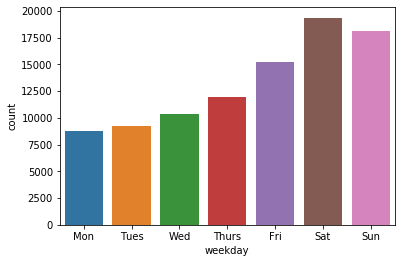

In [176]:
# Weekly data plot

logins['weekday']=logins.login_time.dt.dayofweek

#Group the data by weekday
logins_weekday = logins.groupby('weekday').count()

#name with the weekday name (is named by 0-6 now)
logins_weekday['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']

#plot the weekday count
sns.barplot(x='weekday',y='count',data=logins_weekday)

The logins increases from Monday to Saturday. Saturday and Sunday have highest amount.

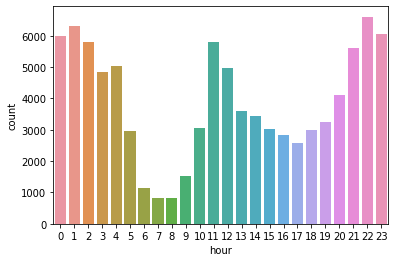

In [177]:
# Hourly plot

logins['hour'] = logins.login_time.dt.hour

#Gropy the timestamp by hour
logins_hour = logins.groupby('hour').count()

sns.barplot(x=logins_hour.index,y='count',data=logins_hour)

There is underlying pattern based on user logins. 
1. The user peak is 21pm-2am and 11am-12pm daily. 
2. There are more users on weekend than weekdays.
3. The amount of logins increase from January to March.

## Part 2 - Experiment and metrics design

### Key measue of success of the experiment

The aim of manager of city operation is encouraging driver partners to be available in both cities. As we know that drivers have to pass the toll bridge to reach another city, we can determine how many drivers serve in both cities by counting the amount of drivers paid the toll. 

### Experimental design

We can use A/B test to evaulation the success of pay-toll reimbursement. 

Randomly select the driver partners as the reimbursed group. For example, pay the dirver partners with odd plate number, while the driver partners with even plate number still need to pay toll by themselves. Collect the data of how many times they paid roll in at least half years. 

### Result interpret

I would use hypothesis test to evauate the result significance, and use one tailed Z-test to determine the p-value.

H0: The difference of times that driver partners paid the toll of two groups is 0. 

Ha: The difference of times that driver partners paid the toll doesn't equal to 0.

If p-value is smaller than 0.05, the significance is too low to reject H0. We would accept H0 that there is no siginificant difference if driver partners were reimbursed or not. In this case, the city operation team needs to change the strategy to encourage driver partners to serve in both cities. Maybe reimbursement for gas or taxes in the trip between two cities specificlly. Or they can adjust the toll reimbursement, by just paying the toll for passing the bridge in certain times. 

If the p-value is larger than 0.05, the significance is high enough to reject H0. We would accept the Ha that there is significance differece between driver partners with reimbursement and driver partners without reimbursement. In  this case, the reimbursement team can further process with the reimburse policy. However, they need to be more cautious with the result. First, they need to make sure the experiment time is long enough. Because the effect of reimbursement is lagged, the experiment time need to be long enough to gurantee that the result is true and trustable. My recommmendation is at least half an year, it can be longer is necessary. Second, is there any pattern for daily, weekly or even monthly changes. The difference of two groups could be higher on weekends or night. There may also be difference between different directions, because the acitivity time is different among two cities. The city operation teams can even make smater decision by just reimbursing pay roll on certain time. At last, evaluate the financial load. The final aim is to encourage people to engaging in more activities, so evaulate if the profit earning is more than toll cost. 

## Part 3: Predictive modeling

### Data description

1. city: city this user signed up in
2. phone: primary device for this user
3. signup_date: date of account registration; in the form ‘YYYY MM DD’
4. last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
5. avg_dist: the average distance in miles per trip taken in the first 30 days after signup
6. avg_rating_by_driver: the rider’s average rating over all of their trips
7. avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
8. surge_pct: the percent of trips taken with surge multiplier > 1
9. avg_surge: The average surge multiplier over all of this user’s trips
10. trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
11. ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
12. weekday_pct: the percent of the user’s trips occurring during a weekday

### Data Cleaning

In [178]:
# Load dataset
import json

file = open('ultimate_data_challenge.json','r')
df = pd.DataFrame(json.load(file))
file.close()

In [179]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [181]:
# Fill missing value with mean

df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)

#Drop the missing value with phone
df.dropna(subset=['phone'],inplace=True)

In [182]:
# formate datetime
df.last_trip_date=pd.to_datetime(df.last_trip_date)
df.signup_date=pd.to_datetime(df.signup_date)

In [183]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,5.785418,4.777862,4.601482,1.074991,8.875314,2.277256,60.883832
std,5.669709,0.446220,0.565227,0.222666,19.989018,3.793300,37.086239
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000
75%,6.930000,5.000000,5.000000,1.050000,8.700000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [184]:
# caculate the user acitivity in last 30 days

# the last day to pull the data
lastday = df.last_trip_date.max()

# the date 30 days before the last day
day_cutoff = lastday - pd.Timedelta('30 days')

# Add a column to save users retention in last 30 days, retented-1, not retented-0
df.retention = df.loc[(df.last_trip_date >= day_cutoff),'retention'] = 1
df.retention = df.loc[(df.last_trip_date < day_cutoff),'retention'] = 0


In [185]:
# get dummy variables for category data

df = pd.get_dummies(df, columns = ['city', 'phone'])

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null datetime64[ns]
signup_date               49604 non-null datetime64[ns]
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
retention                 49604 non-null float64
city_Astapor              49604 non-null uint8
city_King's Landing       49604 non-null uint8
city_Winterfell           49604 non-null uint8
phone_Android             49604 non-null uint8
phone_iPhone              49604 non-null uint8
dtypes: bool(1), datetime64[ns](2), float64(7), int64(1), uint8(5)
memory usage: 4.4 MB


In [194]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct', 'retention', 'city_Astapor',
       'city_King's Landing', 'city_Winterfell', 'phone_Android',
       'phone_iPhone'],
      dtype='object')

### Data Explory

In [187]:
# Visualize the distribution of each feature

sns.barplot = (x=[''])

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,1.0,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,0.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,1.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,0.0,0,0,1,1,0


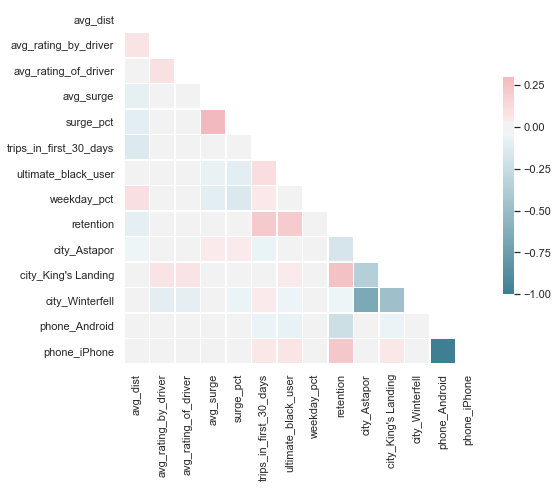

In [198]:
# plot the correlation heat map

sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask)

What we care is the retention column. According to the correlation heatmap:
1. trips_in_first_30_days and ultimate_black_user is positive correlated with retension
2. avg_dist is slightly negatively correlated with retension
3. Iphone is positively while Android is negatively correlated with retension
4. King's Landing city is positively correlated with retention, while Astapor nagetively correclated. Winterfell city is slightly negatively correlated.

Besides above, other features are not obvious correlated with retension. 

### Predictive modeling

Since we have labeled the data with retention or not, we would use supervised machine learning model. I will evaluate with folloing models:
1. Logistic Regression (LR)
2. K-Nearest Neighbor (KNN)
3. Support Vector Machine (SVM)
4. Decision Trees (DT)
5. Random Forest (RF)
6. Naive Bayes (NB)

#### Search for the optimized parameter and train the model

In [268]:
# Separate the X group and y group
X = df.drop(['retention','last_trip_date', 'signup_date'],1)
y = df.retention

In [275]:
# Normalize the data

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X)

# standardize the data attributes
standardized_X = preprocessing.scale(X)

In [279]:
# split data into train dataset and test dataset

from sklearn.model_selection import train_test_split,GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(standardized_X,y,test_size=0.3,random_state=21,stratify=y)

In [281]:
# Logistic Regression model parameter optimized

from sklearn.linear_model import LogisticRegression

Cs=[0.01,0.1,1,10]
param_grid_logreg={'C':Cs,'solver':['lbfgs','newton-cg']}
lr=LogisticRegression()
lr_cv=GridSearchCV(logreg,param_grid_logreg,cv=5)
lr_cv.fit(X_train,y_train)
print(logreg_cv.best_params_,logreg_cv.best_score_)

{'C': 1, 'solver': 'lbfgs'} 0.7186797995507171


In [293]:
# Train and fit the Logistic Regression model

lr = LogisticRegression(C=1, solver = 'lbfgs')
lr.fit(X_train,y_train)
y_predict_lr=lr.predict(X_test)

In [285]:
# K-Nearest Neighbor (KNN) parameter optimized

from sklearn.neighbors import KNeighborsClassifier

param_grid={'n_neighbors':np.arange(1,30)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_,knn_cv.best_score_)

{'n_neighbors': 20} 0.7638960889349692


In [302]:
# Train and fit the KNN model

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)
y_predict_knn=knn.predict(X_test)

In [287]:
# Support Vector MAchine parameter optimized

from sklearn.svm import SVC

Cs=[0.01,0.1,1,10]
gammas=[0.001,0.01,0.1]
kernels=['linear', 'poly', 'rbf']
param_grid_svc={'C':Cs,'kernel':kernels,'gamma':gammas}
svc=SVC()
svc_cv=GridSearchCV(svc,param_grid_svc,cv=5)
svc_cv.fit(X_train,y_train)

print(svc_cv.best_params_,svc_cv.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'} 0.7695121248775992


In [295]:
# Train and fit SVM model

svc = SVC(C=10, kernel='rbf',gamma=0.1,probability=True)
svc.fit(X_train,y_train)


In [303]:
y_predict_svc=svc.predict(X_test)

In [290]:
# Decision Tree model optimized parameters

from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {'max_depth': np.arange(3, 10)}

tree = DecisionTreeClassifier()
tree_cv=GridSearchCV(tree,param_grid_tree,cv=5)
tree_cv.fit(X_train,y_train)
print(tree_cv.best_params_,tree_cv.best_score_)

{'max_depth': 8} 0.7727089453372502


In [304]:
# Train and fit desicion tree model

tree = DecisionTreeClassifier(max_depth=8)
tree.fit(X_train,y_train)
y_predict_tree=tree.predict(X_test)

In [292]:
# Random Forest optimized parameter
from sklearn.ensemble import RandomForestClassifier

estimators=[10,100,300,500,800]
criterions=['gini','entropy']
grid_param_rf={'n_estimators':estimators,'criterion':criterions,'bootstrap':[True]}
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,grid_param_rf,cv=5)
rf_cv.fit(X_train,y_train)

print(rf_cv.best_params_,rf_cv.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 300} 0.7591152583376534


In [305]:
# Train and fit Random Forest model

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict_rf=rf.predict(X_test)

/Users/elisechen/anaconda3/envs/TestEnv/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [306]:
# Train and fit Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_predict_gnb=gnb.predict(X_test)

#### Accurate Score of each model

In [300]:
from sklearn.metrics import accuracy_score

In [322]:
print('The accuracy score of Logistic Regression model is '+str(round(accuracy_score(y_predict_lr,y_test),2)))
print('The accuracy score of K-Nearest Neighbor model is '+str(round(accuracy_score(y_predict_knn,y_test),2)))
print('The accuracy score of Support Vector Mechine model is '+str(round(accuracy_score(y_predict_svc,y_test),2)))
print('The accuracy score of Decision Trees model is '+str(round(accuracy_score(y_predict_tree,y_test),2)))
print('The accuracy score of Random Forest model is '+str(round(accuracy_score(y_predict_rf,y_test),2)))
print('The accuracy score of Naive Bayes model is '+str(round(accuracy_score(y_predict_gnb,y_test),2)))

The accuracy score of Logistic Regression model is 0.72
The accuracy score of K-Nearest Neighbor model is 0.76
The accuracy score of Support Vector Mechine model is 0.77
The accuracy score of Decision Trees model is 0.77
The accuracy score of Random Forest model is 0.75
The accuracy score of Naive Bayes model is 0.7


#### Classification Report

In [323]:
from sklearn.metrics import classification_report,confusion_matrix

In [324]:
print('Classifiction report of Logistic Regression model:\n',classification_report(y_predict_lr,y_test))
print('Classifiction report of K-Nearest Neighbor model:\n',classification_report(y_predict_knn,y_test))
print('Classifiction report of Support Vector Mechine model:\n',classification_report(y_predict_svc,y_test))
print('Classifiction report of Decision Trees model:\n',classification_report(y_predict_tree,y_test))
print('Classifiction report of Random Forest model:\n',classification_report(y_predict_rf,y_test))
print('Classifiction report of Naive Bayes model:\n',classification_report(y_predict_gnb,y_test))

Classifiction report of Logistic Regression model:
               precision    recall  f1-score   support

         0.0       0.85      0.74      0.79     10756
         1.0       0.49      0.67      0.57      4126

    accuracy                           0.72     14882
   macro avg       0.67      0.70      0.68     14882
weighted avg       0.75      0.72      0.73     14882

Classifiction report of K-Nearest Neighbor model:
               precision    recall  f1-score   support

         0.0       0.86      0.78      0.82     10163
         1.0       0.60      0.72      0.66      4719

    accuracy                           0.76     14882
   macro avg       0.73      0.75      0.74     14882
weighted avg       0.78      0.76      0.77     14882

Classifiction report of Support Vector Mechine model:
               precision    recall  f1-score   support

         0.0       0.87      0.79      0.83     10203
         1.0       0.62      0.74      0.67      4679

    accuracy            

#### ROC curve and AUC

In [325]:
from sklearn.metrics import roc_curve,auc

In [329]:
def plot_ROC_and_AUC(model,title):
    y_scores_model = model.predict_proba(X_test)
    fpr, tpr, threshold = roc_curve(y_test, y_scores_model[:, 1])
    roc_auc = auc(fpr, tpr)
    #plot the ROC curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #axis label
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(title)
    plt.show()

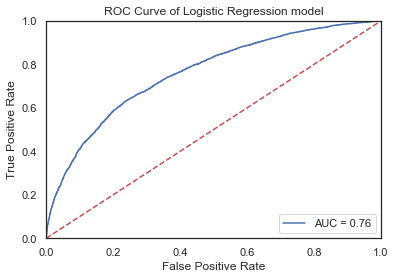

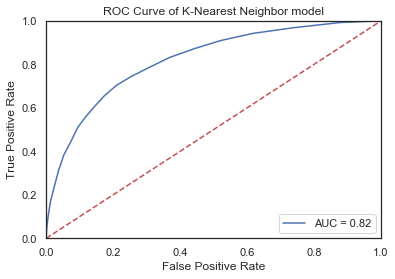

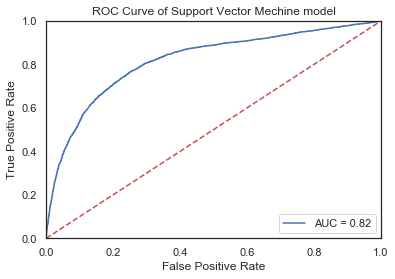

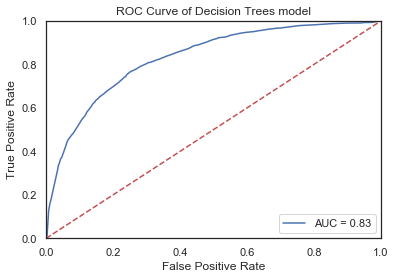

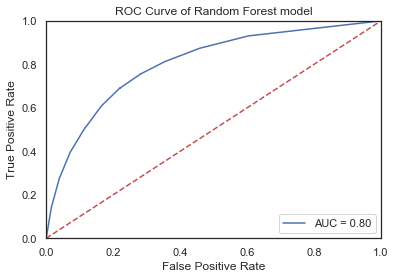

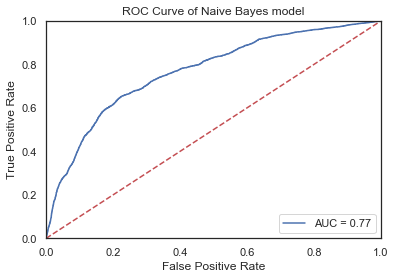

In [331]:
plot_ROC_and_AUC(lr,'ROC Curve of Logistic Regression model')
plot_ROC_and_AUC(knn,'ROC Curve of K-Nearest Neighbor model')
plot_ROC_and_AUC(svc,'ROC Curve of Support Vector Mechine model')
plot_ROC_and_AUC(tree,'ROC Curve of Decision Trees model')
plot_ROC_and_AUC(rf,'ROC Curve of Random Forest model')
plot_ROC_and_AUC(gnb,'ROC Curve of Naive Bayes model')

The Decision Tree model got best performance. I would choose to use decision tree model to predict the user retention. 

#### Feature importance of Decision Tree

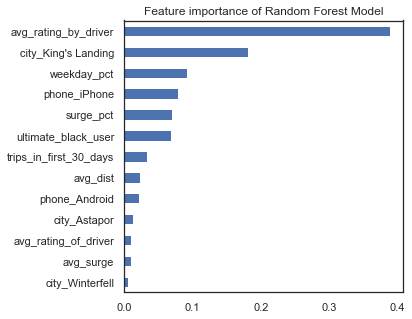

In [339]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=True)

importances.plot(kind='barh',figsize=(5,5))
plt.title("Feature importance of Random Forest Model")
plt.show()

## Conclusion

Conpared with 6 models above, I would choose decision tree to predict user retension. It has best performance socre. The accuracy score is 0.77, and AUC=0.83. 

The most important feature of this model is avg_rating_by_driver. It weights almost 40% of all feature importance. City_King's Landing is the second important feature. Thus Ultimate should consider the factors that may affect the driver rating, and take actions to imporve they rate. Besides, they may consider to spend more effort on marketing in King's Lnading city, because they have positively correlation with user retention, and high feature importance.